In [ ]:
import tensorflow as tf
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from tensorflow import keras
from tensorflow.keras import models
import cv2

In [ ]:
import pandas as pd
import numpy as np
import math
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Domain_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Super_MLDOMAIN_MCLS2.csv')
Domain_data.drop(["Unnamed: 0"], axis=1, inplace=True)
Domain_data.head()

,domain_name,dga_family,domain,length,entropy,first_Digit_Index,H_entropy,vowel_consonant_ratio,vowel_character_ratio,consonant_character_ratio,level_no,alexa_grams,words_grams
0,odqzesdvd.info,Super_family_2,odqzesdvd,9,2.641604,0,3.324863,0.444444,0.285714,0.642857,2,8.618689,10.200253
1,mcrwnxdzu.info,Super_family_2,mcrwnxdzu,9,3.169925,0,3.664498,0.300000,0.214286,0.714286,2,5.331953,4.442651
2,poxrscvfoy.biz,Super_family_2,poxrscvfoy,10,3.121928,0,3.664498,0.300000,0.214286,0.714286,2,9.758886,11.231941
3,dupzwi.info,Super_family_2,dupzwi,6,2.584963,0,3.277613,0.666667,0.363636,0.545455,2,3.861893,7.928046
4,pgldibr.com,Super_family_2,pgldibr,7,2.807355,0,3.459432,0.250000,0.181818,0.727273,2,12.146719,20.785039


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Create label encoder object
labels = LabelEncoder()

# Convert continous y values to categorical
Domain_data['family_label'] = labels.fit_transform(Domain_data['dga_family'])

In [ ]:
Domain_data.head()

,domain_name,dga_family,domain,length,entropy,first_Digit_Index,H_entropy,vowel_consonant_ratio,vowel_character_ratio,consonant_character_ratio,level_no,alexa_grams,words_grams,family_label
0,odqzesdvd.info,Super_family_2,odqzesdvd,9,2.641604,0,3.324863,0.444444,0.285714,0.642857,2,8.618689,10.200253,1
1,mcrwnxdzu.info,Super_family_2,mcrwnxdzu,9,3.169925,0,3.664498,0.300000,0.214286,0.714286,2,5.331953,4.442651,1
2,poxrscvfoy.biz,Super_family_2,poxrscvfoy,10,3.121928,0,3.664498,0.300000,0.214286,0.714286,2,9.758886,11.231941,1
3,dupzwi.info,Super_family_2,dupzwi,6,2.584963,0,3.277613,0.666667,0.363636,0.545455,2,3.861893,7.928046,1
4,pgldibr.com,Super_family_2,pgldibr,7,2.807355,0,3.459432,0.250000,0.181818,0.727273,2,12.146719,20.785039,1


In [ ]:
X= Domain_data.drop(["dga_family", "domain_name", "domain","family_label"], axis=1)
y = Domain_data["family_label"]

In [ ]:
grouped=Domain_data['dga_family'].groupby(Domain_data['dga_family'])
grouped.count()

dga_family
Super_family_1     613032
Super_family_2    1251686
Super_family_3     201043
Super_family_4       1273
Super_family_5       9480
Super_family_6        124
Name: dga_family, dtype: int64

Class=1, n=1251686 (60.275%)
Class=2, n=201043 (9.681%)
Class=3, n=1273 (0.061%)
Class=4, n=9480 (0.457%)
Class=5, n=124 (0.006%)
Class=0, n=613032 (29.520%)


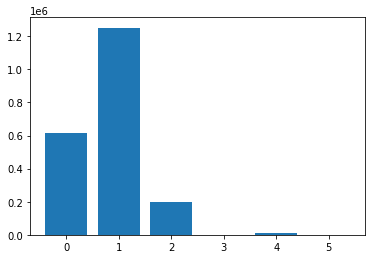

In [ ]:
from matplotlib import pyplot
from collections import Counter
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8,  random_state=42)

In [ ]:
grouped=y_train.groupby(y_train)
grouped.count()

family_label
0     490684
1    1001088
2     160929
3       1016
4       7497
5         96
Name: family_label, dtype: int64

Class=1, n=1001088 (60.259%)
Class=0, n=490684 (29.536%)
Class=2, n=160929 (9.687%)
Class=4, n=7497 (0.451%)
Class=3, n=1016 (0.061%)
Class=5, n=96 (0.006%)


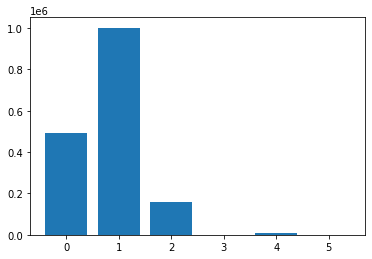

In [ ]:
from matplotlib import pyplot
from collections import Counter
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

# Ensembling 

In [ ]:
# ML Algorithms used 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC

In [ ]:
print('X train size: ', X_train.shape)
print('y train size: ', y_train.shape)
print('X test size: ', X_test.shape)
print('y test size: ', y_test.shape)

X train size:  (1661310, 10)
y train size:  (1661310,)
X test size:  (415328, 10)
y test size:  (415328,)


## Resampling

In [ ]:
from imblearn.over_sampling import SMOTE
strategy = {2:166131,3:332262,4:249197, 5:249197} 
ovrsmt = SMOTE(sampling_strategy=strategy)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
strategy = {2:166131,3:332262,4:249197, 5:249197} 
ovrsmt = RandomOverSampler(sampling_strategy=strategy)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
udrsmt = RandomUnderSampler(sampling_strategy={0:332262,1:332262})

In [ ]:
from imblearn.pipeline import Pipeline
steps = [('o', ovrsmt), ('u', udrsmt)]
pipeline = Pipeline(steps=steps)

In [ ]:
X_train, y_train = pipeline.fit_resample(X_train, y_train)

In [ ]:
grouped=y_train.groupby(y_train)
grouped.count()

family_label
0    332262
1    332262
2    166131
3    332262
4    249197
5    249197
Name: family_label, dtype: int64

In [ ]:
grouped=y_train.groupby(y_train)
grouped.count()

family_label
0    332262
1    332262
2    166131
3    332262
4    249197
5    249197
Name: family_label, dtype: int64

Class=0, n=332262 (20.000%)
Class=1, n=332262 (20.000%)
Class=2, n=166131 (10.000%)
Class=3, n=332262 (20.000%)
Class=4, n=249197 (15.000%)
Class=5, n=249197 (15.000%)


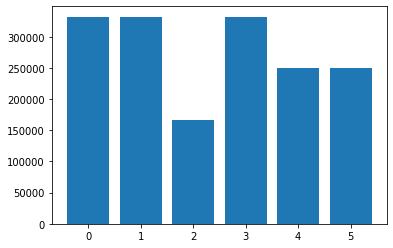

In [ ]:
from matplotlib import pyplot
from collections import Counter
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(max_depth= 50, n_estimators =200)
RFmodel=rf_classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
RFpred = RFmodel.predict(X_test)
print(classification_report(y_test,RFpred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    122348
           1       0.99      0.98      0.99    250598
           2       0.99      0.99      0.99     40114
           3       0.86      0.95      0.90       257
           4       0.69      0.50      0.58      1983
           5       0.77      0.61      0.68        28

    accuracy                           0.98    415328
   macro avg       0.88      0.84      0.85    415328
weighted avg       0.98      0.98      0.98    415328



In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
RFpred = RFmodel.predict(X_test)
print(classification_report(y_test,RFpred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    122348
           1       0.99      0.98      0.99    250598
           2       0.99      0.99      0.99     40114
           3       0.86      0.94      0.90       257
           4       0.69      0.50      0.58      1983
           5       0.74      0.61      0.67        28

    accuracy                           0.98    415328
   macro avg       0.87      0.83      0.85    415328
weighted avg       0.98      0.98      0.98    415328



In [ ]:
print('accuracy on the train set: ', accuracy_score(RFmodel.predict(X_train), y_train))
print('accuracy on the test set: ', accuracy_score(y_test, RFpred))

accuracy on the train set:  0.9999897671176559
accuracy on the test set:  0.9798833692888512


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

etpprd = RFmodel.predict_proba(X_test)

In [ ]:
auc = metrics.roc_auc_score(y_test, etpprd, multi_class='ovo', average='weighted')
print(auc)

0.9903686200610993


In [ ]:
auc = metrics.roc_auc_score(y_test, etpprd, multi_class='ovo', average='weighted')
print(auc)

0.9910153890925419


### tuning RF

In [ ]:
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier()
rfparam = {'n_estimators': [50,100,200],
    'max_depth' : [10, 20, 50]                                                                                                                  
           }

In [ ]:
# train across 10 folds, that's a total of (12+6)*5=90 rounds of training 
grid_forest_clf = HalvingGridSearchCV(rfclf, rfparam, scoring='accuracy')
grid_forest_clf.fit(X_train, y_train)

HalvingGridSearchCV(estimator=RandomForestClassifier(),
                    param_grid={'max_depth': [10, 20, 50],
                                'n_estimators': [50, 100, 200]},
                    scoring='accuracy')

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_forest_clf.best_score_, grid_forest_clf.best_params_))
means = grid_forest_clf.cv_results_['mean_test_score']
stds = grid_forest_clf.cv_results_['std_test_score']
params = grid_forest_clf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.992098 using {'max_depth': 50, 'n_estimators': 200}
0.918363 (0.001764) with: {'max_depth': 10, 'n_estimators': 50}
0.919040 (0.002470) with: {'max_depth': 10, 'n_estimators': 100}
0.918954 (0.001359) with: {'max_depth': 10, 'n_estimators': 200}
0.976851 (0.000940) with: {'max_depth': 20, 'n_estimators': 50}
0.976997 (0.000924) with: {'max_depth': 20, 'n_estimators': 100}
0.977366 (0.000725) with: {'max_depth': 20, 'n_estimators': 200}
0.979570 (0.000516) with: {'max_depth': 50, 'n_estimators': 50}
0.979879 (0.000671) with: {'max_depth': 50, 'n_estimators': 100}
0.979868 (0.000469) with: {'max_depth': 50, 'n_estimators': 200}
0.988925 (0.000330) with: {'max_depth': 50, 'n_estimators': 50}
0.989237 (0.000255) with: {'max_depth': 50, 'n_estimators': 200}
0.989185 (0.000274) with: {'max_depth': 50, 'n_estimators': 100}
0.992098 (0.000100) with: {'max_depth': 50, 'n_estimators': 200}


In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
RFpred = grid_forest_clf.predict(X_test)
print(classification_report(y_test,RFpred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    122348
           1       0.99      0.98      0.99    250598
           2       0.99      0.99      0.99     40114
           3       0.88      0.92      0.90       257
           4       0.73      0.46      0.57      1983
           5       0.90      0.68      0.78        28

    accuracy                           0.98    415328
   macro avg       0.91      0.84      0.87    415328
weighted avg       0.98      0.98      0.98    415328



In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

etpprd = grid_forest_clf.predict_proba(X_test)

In [ ]:
auc = metrics.roc_auc_score(y_test, etpprd, multi_class='ovo', average='weighted')
print(auc)

0.9917795611663914


### VT

In [ ]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
# create the sub models

# define the base models
estimators = []
model1 = LogisticRegression()
estimators.append(('lr', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model4 = GaussianNB()
estimators.append(('nb', model4))


# create the ensemble model
VTensemble = VotingClassifier(estimators,voting='soft').fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
ensemblepred = VTensemble.predict(X_test)
print(classification_report(y_test,ensemblepred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91    122348
           1       0.99      0.91      0.95    250598
           2       0.98      0.98      0.98     40114
           3       0.10      0.96      0.18       257
           4       0.06      0.57      0.11      1983
           5       0.00      1.00      0.01        28

    accuracy                           0.91    415328
   macro avg       0.51      0.88      0.52    415328
weighted avg       0.97      0.91      0.94    415328



In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

etpprd = VTensemble.predict_proba(X_test)

In [ ]:
#fpr,tpr, _ = metrics.roc_curve(y_test,etpprd)
#auc = metrics.roc_auc_score(y_test,etpprd)
#roc auc score
auc = metrics.roc_auc_score(y_test, etpprd, multi_class='ovo', average='weighted')
print(auc)

0.9783704416253902


### tuning VT

In [ ]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# define the base models
estimators = []
model1 = LogisticRegression()
estimators.append(('lr', model1))
model2 = DecisionTreeClassifier()
estimators.append(('dt', model2))
model4 = GaussianNB()
estimators.append(('nb', model4))


# create the ensemble model
VTensemble = VotingClassifier(estimators,voting='soft')

params = {'dt__criterion': ['gini','entropy'],
          'dt__max_depth':[10,20],
      'lr__C':[0.01,0.1,0.5,1],
      }

grid=HalvingGridSearchCV(VTensemble, params).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
# summarize results
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
 print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.930122 using {'dt__criterion': 'entropy', 'dt__max_depth': 20, 'lr__C': 1}
0.868793 (0.001779) with: {'dt__criterion': 'gini', 'dt__max_depth': 10, 'lr__C': 0.01}
0.868040 (0.001374) with: {'dt__criterion': 'gini', 'dt__max_depth': 10, 'lr__C': 0.1}
0.868002 (0.002255) with: {'dt__criterion': 'gini', 'dt__max_depth': 10, 'lr__C': 0.5}
0.869692 (0.000954) with: {'dt__criterion': 'gini', 'dt__max_depth': 10, 'lr__C': 1}
0.921175 (0.001792) with: {'dt__criterion': 'gini', 'dt__max_depth': 20, 'lr__C': 0.01}
0.919604 (0.001529) with: {'dt__criterion': 'gini', 'dt__max_depth': 20, 'lr__C': 0.1}
0.920194 (0.001617) with: {'dt__criterion': 'gini', 'dt__max_depth': 20, 'lr__C': 0.5}
0.921516 (0.001077) with: {'dt__criterion': 'gini', 'dt__max_depth': 20, 'lr__C': 1}
0.869638 (0.001606) with: {'dt__criterion': 'entropy', 'dt__max_depth': 10, 'lr__C': 0.01}
0.869221 (0.001172) with: {'dt__criterion': 'entropy', 'dt__max_depth': 10, 'lr__C': 0.1}
0.869188 (0.000836) with: {'dt__criterion'

In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
ensemblepred = grid.predict(X_test)
print(classification_report(y_test,ensemblepred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90    122348
           1       0.99      0.90      0.95    250598
           2       0.98      0.98      0.98     40114
           3       0.09      0.94      0.17       257
           4       0.06      0.64      0.10      1983
           5       0.00      1.00      0.01        28

    accuracy                           0.90    415328
   macro avg       0.51      0.89      0.52    415328
weighted avg       0.97      0.90      0.93    415328



In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

pprd = grid.predict_proba(X_test)

In [ ]:
#roc auc score
auc = metrics.roc_auc_score(y_test, pprd, multi_class='ovo', average='weighted')
print(auc)

0.9813435109155074


### tuning BDT

In [ ]:
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv 
from sklearn.ensemble import BaggingClassifier
# now import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
param_grid = {
    'base_estimator__max_depth' : [10, 30, 50],
    'max_samples' : [0.05, 0.2, 0.5]
}

clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),
                                     n_estimators = 100, max_features = 0.5),
                   param_grid)
clf.fit(X_train, y_train)

GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         max_features=0.5, n_estimators=100),
             param_grid={'base_estimator__max_depth': [10, 30, 50],
                         'max_samples': [0.05, 0.2, 0.5]})

In [ ]:
# summarize results
print("Best: %f using %s" % (clf.best_score_, clf.best_params_))
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.989761 using {'base_estimator__max_depth': 30, 'max_samples': 0.5}
0.919085 (0.003496) with: {'base_estimator__max_depth': 10, 'max_samples': 0.05}
0.919972 (0.002865) with: {'base_estimator__max_depth': 10, 'max_samples': 0.2}
0.921092 (0.002441) with: {'base_estimator__max_depth': 10, 'max_samples': 0.5}
0.980715 (0.000692) with: {'base_estimator__max_depth': 30, 'max_samples': 0.05}
0.988030 (0.000609) with: {'base_estimator__max_depth': 30, 'max_samples': 0.2}
0.989761 (0.000246) with: {'base_estimator__max_depth': 30, 'max_samples': 0.5}
0.980560 (0.000668) with: {'base_estimator__max_depth': 50, 'max_samples': 0.05}
0.988158 (0.000509) with: {'base_estimator__max_depth': 50, 'max_samples': 0.2}
0.989724 (0.000490) with: {'base_estimator__max_depth': 50, 'max_samples': 0.5}


In [ ]:
from sklearn.metrics import classification_report
bdtpred = clf.predict(X_test)
print(classification_report(y_test,bdtpred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96    122348
           1       0.99      0.97      0.98    250598
           2       0.99      0.99      0.99     40114
           3       0.84      0.93      0.88       257
           4       0.75      0.44      0.56      1983
           5       0.85      0.79      0.81        28

    accuracy                           0.97    415328
   macro avg       0.89      0.85      0.86    415328
weighted avg       0.97      0.97      0.97    415328



In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

pprd = clf.predict_proba(X_test)

In [ ]:
auc = metrics.roc_auc_score(y_test, pprd, multi_class='ovo', average='weighted')
print(auc)

0.9906599737818274


### tuning xgb

In [ ]:
from xgboost import XGBClassifier
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingGridSearchCV

xgb_classifier = XGBClassifier()
xgbparams = {'max_depth': [5,10,20,50]}

xgbgrid = HalvingGridSearchCV(xgb_classifier, xgbparams, scoring='accuracy', n_jobs=-1).fit(X_train, y_train)


KeyboardInterrupt: ignored

In [ ]:
# summarize results
print("Best: %f using %s" % (xgbgrid.best_score_, clf.best_params_))
means = xgbgrid.cv_results_['mean_test_score']
stds = xgbgrid.cv_results_['std_test_score']
params = xgbgrid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
XGBpred = xgbgrid.predict(X_test)
print(classification_report(y_test,XGBpred))

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

pprd = xgbgrid.predict_proba(X_test)

In [ ]:
auc = metrics.roc_auc_score(y_test, pprd, multi_class='ovo', average='weighted')
print(auc)

### tuning AB

In [ ]:
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(DecisionTreeClassifier())
abparam = {'learning_rate': [0.001,0.01, 0.1, 1]                                                                                                               
           }

In [ ]:
abclf = HalvingGridSearchCV(clf, abparam, scoring='accuracy').fit(X_train, y_train)

In [ ]:

# summarize results
print("Best: %f using %s" % (abclf.best_score_, abclf.best_params_))
means = abclf.cv_results_['mean_test_score']
stds = abclf.cv_results_['std_test_score']
params = abclf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.991923 using {'learning_rate': 1}
0.980560 (0.000349) with: {'learning_rate': 0.001}
0.980613 (0.000192) with: {'learning_rate': 0.01}
0.983061 (0.001239) with: {'learning_rate': 0.1}
0.989884 (0.000322) with: {'learning_rate': 1}
0.987361 (0.000717) with: {'learning_rate': 0.1}
0.991923 (0.000277) with: {'learning_rate': 1}


In [ ]:
 from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
 y_true, y_pred = y_test, abclf.predict(X_test)
 print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    122348
           1       0.99      0.98      0.99    250598
           2       0.99      0.99      0.99     40114
           3       0.93      0.89      0.91       257
           4       0.82      0.42      0.56      1983
           5       0.94      0.61      0.74        28

    accuracy                           0.98    415328
   macro avg       0.94      0.81      0.86    415328
weighted avg       0.98      0.98      0.98    415328



In [ ]:
print('accuracy on the train set: ', accuracy_score(abclf.predict(X_train), y_train))
print('accuracy on the test set: ', accuracy_score(y_test, y_pred))

accuracy on the train set:  0.9999945825917002
accuracy on the test set:  0.9794523846213113


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

pprd = abclf.predict_proba(X_test)

In [ ]:
auc = metrics.roc_auc_score(y_test, pprd, multi_class='ovo', average='weighted')
print(auc)

0.9852694277475343


In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/sMCL_ABmodel_m_TN.sav'
pickle.dump(abclf, open(filename, 'wb'))

## ST2

In [ ]:
# make a prediction with a stacking ensemble
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn import model_selection
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# define the base models
estimators = []
model1 = LogisticRegression()
estimators.append(('lr', model1))
model2 = DecisionTreeClassifier()
estimators.append(('dt', model2))
model4 = GaussianNB()
estimators.append(('nb', model4))

# define meta learner model
level1 = LogisticRegression()

# define the stacking ensemble
ensemble = StackingClassifier(estimators=estimators,  final_estimator=level1, stack_method='predict', n_jobs=-1)

params = {'dt__criterion': ['gini','entropy'],
          'dt__max_depth':[5,10,20],
      'lr__C':[0.01,0.1,1]}

grid=HalvingGridSearchCV(ensemble, params).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
# summarize results
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
ensemblepred = grid.predict(X_test)
print(classification_report(y_test,ensemblepred))

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

etpprd = grid.predict_proba(X_test)

In [ ]:
#fpr,tpr, _ = metrics.roc_curve(y_test,etpprd)
#auc = metrics.roc_auc_score(y_test,etpprd)
#roc auc score
auc = metrics.roc_auc_score(y_test, etpprd, multi_class='ovo', average='weighted')
print(auc)

## ST

In [ ]:
# make a prediction with a stacking ensemble
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn import model_selection
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# define the base models
estimators = []
model1 = LogisticRegression()
estimators.append(('lr', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model4 = GaussianNB()
estimators.append(('nb', model4))

# define meta learner model
level1 = LogisticRegression()

# define the stacking ensemble
ensemble = StackingClassifier(estimators=estimators,  final_estimator=level1).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
ensemblepred = ensemble.predict(X_test)
print(classification_report(y_test,ensemblepred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95    122348
           1       0.99      0.97      0.98    250598
           2       0.98      0.99      0.99     40114
           3       0.86      0.87      0.87       257
           4       0.38      0.45      0.41      1983
           5       0.53      0.61      0.57        28

    accuracy                           0.97    415328
   macro avg       0.78      0.81      0.79    415328
weighted avg       0.97      0.97      0.97    415328



In [ ]:
df_class_report=classification_report(y_test,ensemble.predict(X_test),output_dict=True)
df = pd.DataFrame(df_class_report).transpose()
df.to_csv('/content/drive/My Drive/Colab Notebooks/ST.csv',  sep=',')

In [ ]:
from sklearn import metricsbetter 
import matplotlib.pyplot as plt

etpprd = ensemble.predict_proba(X_test)

In [ ]:
#fpr,tpr, _ = metrics.roc_curve(y_test,etpprd)
#auc = metrics.roc_auc_score(y_test,etpprd)
#roc auc score
auc = metrics.roc_auc_score(y_test, etpprd, multi_class='ovo', average='weighted')
print(auc)

0.9737057512343096


## DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(X_train, y_train) #have no n_estimator variable

In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
dtprd = dt.predict(X_test)
print(classification_report(y_test,dtprd))



              precision    recall  f1-score   support

           0       0.94      0.96      0.95    122348
           1       0.99      0.97      0.98    250598
           2       0.98      0.99      0.99     40114
           3       0.87      0.88      0.87       257
           4       0.39      0.46      0.42      1983
           5       0.49      0.61      0.54        28

    accuracy                           0.97    415328
   macro avg       0.78      0.81      0.79    415328
weighted avg       0.97      0.97      0.97    415328



In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

etpprd = dt.predict_proba(X_test)

In [ ]:
#fpr,tpr, _ = metrics.roc_curve(y_test,etpprd)
#auc = metrics.roc_auc_score(y_test,etpprd)
#roc auc score
auc = metrics.roc_auc_score(y_test, etpprd, multi_class='ovo', average='weighted')
print(auc)

0.91880683163912


## DT2

In [ ]:
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
max_depth = [5,10,20,50]

param_grid = dict(criterion=criterion,max_depth=max_depth)
abclf = HalvingGridSearchCV(dtc, param_grid, scoring='accuracy').fit(X_train, y_train)           

In [ ]:

# summarize results
print("Best: %f using %s" % (abclf.best_score_, abclf.best_params_))
means = abclf.cv_results_['mean_test_score']
stds = abclf.cv_results_['std_test_score']
params = abclf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.986319 using {'criterion': 'entropy', 'max_depth': 50}
0.813956 (0.001159) with: {'criterion': 'gini', 'max_depth': 5}
0.908339 (0.000928) with: {'criterion': 'gini', 'max_depth': 10}
0.969850 (0.000418) with: {'criterion': 'gini', 'max_depth': 20}
0.980259 (0.000477) with: {'criterion': 'gini', 'max_depth': 50}
0.815014 (0.000938) with: {'criterion': 'entropy', 'max_depth': 5}
0.915233 (0.000464) with: {'criterion': 'entropy', 'max_depth': 10}
0.973079 (0.000254) with: {'criterion': 'entropy', 'max_depth': 20}
0.980730 (0.000291) with: {'criterion': 'entropy', 'max_depth': 50}
0.977107 (0.000168) with: {'criterion': 'entropy', 'max_depth': 20}
0.985975 (0.000176) with: {'criterion': 'gini', 'max_depth': 50}
0.986319 (0.000211) with: {'criterion': 'entropy', 'max_depth': 50}


In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
dtprd = abclf.predict(X_test)
print(classification_report(y_test,dtprd))



              precision    recall  f1-score   support

           0       0.95      0.96      0.95    122348
           1       0.99      0.97      0.98    250598
           2       0.98      0.99      0.99     40114
           3       0.87      0.87      0.87       257
           4       0.38      0.48      0.43      1983
           5       0.65      0.79      0.71        28

    accuracy                           0.97    415328
   macro avg       0.80      0.84      0.82    415328
weighted avg       0.97      0.97      0.97    415328



In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

etpprd = abclf.predict_proba(X_test)

In [ ]:
#fpr,tpr, _ = metrics.roc_curve(y_test,etpprd)
#auc = metrics.roc_auc_score(y_test,etpprd)
#roc auc score
auc = metrics.roc_auc_score(y_test, etpprd, multi_class='ovo', average='weighted')
print(auc)

0.9317898840356362


## XGB

In [ ]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier().fit(X_train, y_train)

In [ ]:
XGBpred = xgb_classifier.predict(X_test)
print(classification_report(y_test,XGBpred))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88    122348
           1       0.98      0.93      0.96    250598
           2       0.99      0.99      0.99     40114
           3       0.35      1.00      0.51       257
           4       0.07      0.69      0.12      1983
           5       0.01      1.00      0.02        28

    accuracy                           0.91    415328
   macro avg       0.55      0.91      0.58    415328
weighted avg       0.96      0.91      0.93    415328



In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
rfpprd = xgb_classifier.predict_proba(X_test)

In [ ]:
#roc auc score
auc = metrics.roc_auc_score(y_test, rfpprd,multi_class="ovr",
                              average="weighted")
print(auc)

0.9894769716727239


## BDT

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier()
BDTmodel = BaggingClassifier(base_estimator=cart).fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report
BDTpred = BDTmodel.predict(X_test)
print(classification_report(y_test,BDTpred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96    122348
           1       0.99      0.98      0.98    250598
           2       0.99      0.99      0.99     40114
           3       0.87      0.93      0.90       257
           4       0.53      0.48      0.50      1983
           5       0.71      0.79      0.75        28

    accuracy                           0.98    415328
   macro avg       0.84      0.86      0.85    415328
weighted avg       0.98      0.98      0.98    415328



In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
rfpprd = BDTmodel.predict_proba(X_test)

In [ ]:
#roc auc score
auc = metrics.roc_auc_score(y_test, rfpprd,multi_class="ovr",
                              average="weighted")
print(auc)

0.9941285588833533


## AB

In [ ]:
from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier()
ABmodel = AdaBoostClassifier(base_estimator=cart).fit(X_train, y_train)

In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
abpred=ABmodel.predict(X_test)
print(classification_report(y_test,abpred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    122348
           1       0.99      0.98      0.99    250598
           2       0.99      0.99      0.99     40114
           3       0.92      0.90      0.91       257
           4       0.82      0.40      0.54      1983
           5       1.00      0.75      0.86        28

    accuracy                           0.98    415328
   macro avg       0.95      0.84      0.88    415328
weighted avg       0.98      0.98      0.98    415328



In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
rfpprd = ABmodel.predict_proba(X_test)

In [ ]:
#roc auc score
auc = metrics.roc_auc_score(y_test, rfpprd,multi_class="ovr",
                              average="weighted")
print(auc)

0.9975251349713552
